# In this notebook I create fake backgrounds  to be used to compensate for incoherent scattering in TOF CT

In [1]:
import os
import shutil
import numpy as np
from skimage import io
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib notebook

from astropy.io import fits

<IPython.core.display.Javascript object>


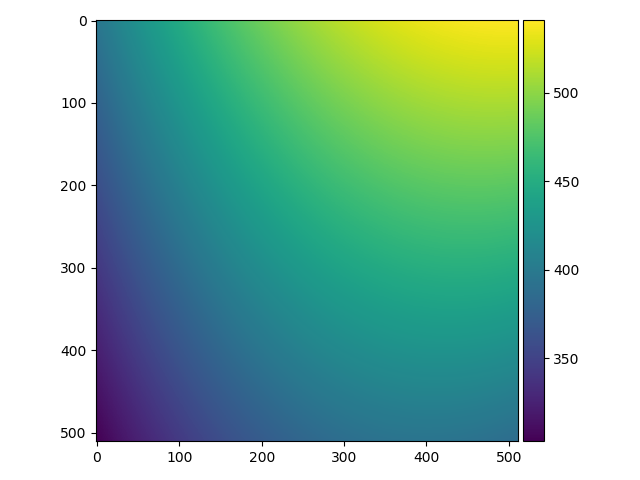

(511, 511)


<IPython.core.display.Javascript object>


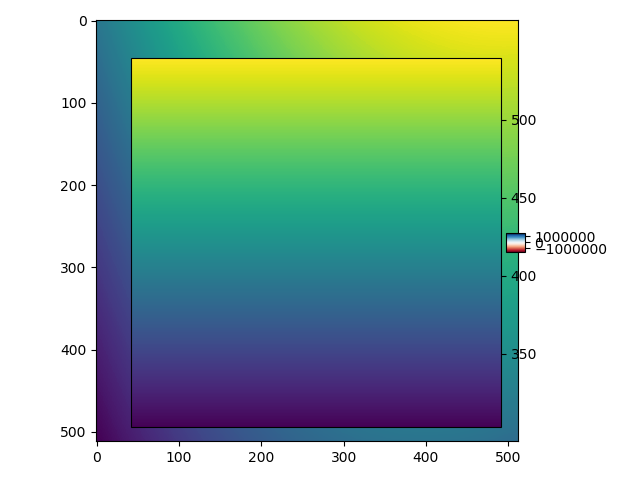

(511, 511)
<class 'numpy.float32'>


C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


In [16]:
# Here I prepare the background meeasurements, Those were the BB measuresments taken from Pierre
background = io.imread('D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/KipToolComputed/flat_background.tif')
plt.figure()
io.imshow(background)
print(np.shape(background))

new_back = np.zeros([512,512], dtype='int16')
new_back[0:511,0:511] = background
new_back[0:511,511] = background[:,510]
new_back[511,0:511] = background[510,:]
new_back[511,511] = background[510,510]

plt.figure()
io.imshow(new_back)
print(np.shape(background))
print(type(background[0,0]))

fits.writeto('out.fits', new_back.astype(int))

In [17]:
path ='D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/'
filename = 'out.fits'
for i in range(0,250):
    newfilename = 'BackGround_'+str(i).zfill(4)+'.fits'
    shutil.copy(path+filename,path+newfilename)

<IPython.core.display.Javascript object>


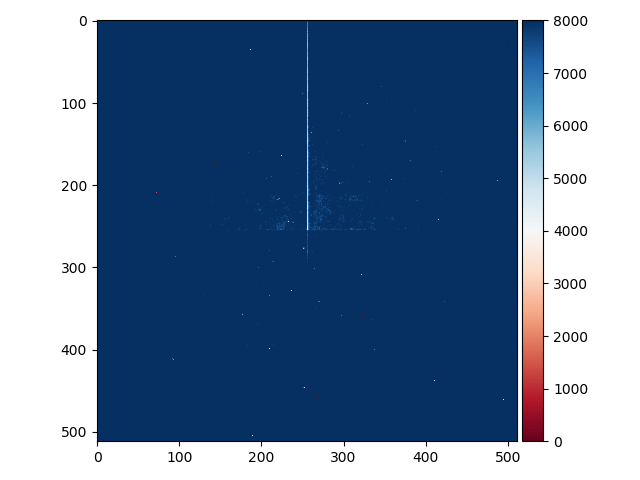

477.1
10156.23026403063
23


In [33]:
# Now i want to:
# [] read the OB image and calculate the average
# [] create the BG image as the 5% of it 
# [] save all of them 

filename = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/WhiteBeam/IMAT_ob__SummedImg_01.fits'
fileob = fits.open(filename)
ob = fileob[0].data
plt.figure()
io.imshow(ob,vmin=0, vmax=8000)

median_ob = np.median(ob).astype(int)*0.05
print(median_ob)
print(np.average(ob))
print((median_ob*0.05).astype(int))

In [42]:
myback = np.zeros([512,512], dtype='int16')
myback[:,:] = median_ob

<IPython.core.display.Javascript object>


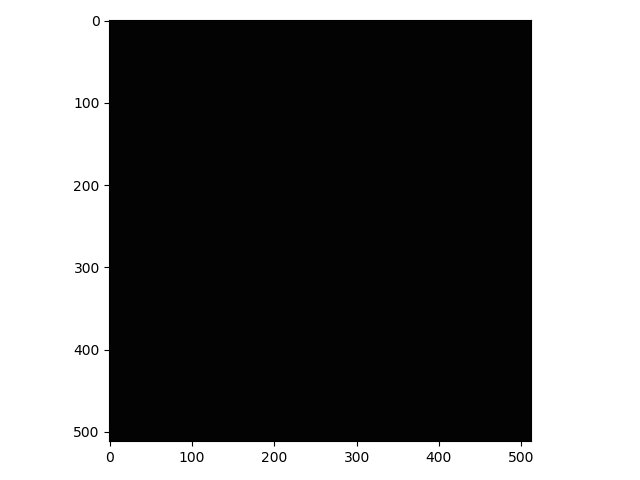

(512, 512) <class 'numpy.ndarray'>


In [47]:
plt.figure()
io.imshow(myback)
print(np.shape(myback), type(myback))

In [52]:
# fits.writeto('myback.fits', myback)

# path ='D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/'
filename = 'myback.fits'
for i in range(0,250):
    newfilename = 'BackGround_'+str(i).zfill(4)+'.fits'
    shutil.copy(filename,newfilename)

In [62]:
myback_file = fits.open('D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Replicated/out.fits')
myback = myback_file[0].data

ob_file = fits.open('D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/WhiteBeam/IMAT_ob__SummedImg_01.fits')
myob = ob_file[0].data

nBins=165
# nBins =1

background_bin = np.zeros([512,512], dtype='int16')
outputpath = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/'

for i in range(1, nBins):
    # read the OB image in that Bin
    filename = 'D:/Kaestner/ISIS_IAEAData/RB1730015/Tomo_test_RB1730044/OpenBeam_aft2_Corrected_Binned/IMAT_tomo_binned_'+str(i).zfill(5)+'.fits'
    OB_bin_filename = fits.open(filename)
    OB_bin = OB_bin_filename[0].data
    
    ratio = np.median(OB_bin)/np.median(myob)
    print(ratio)
    background_bin = (myback*ratio)
    outputfolder = outputpath + 'Bin_' +str(i).zfill(4)
    
    print(outputfolder)
    
    if not os.path.exists(outputfolder):
        os.makedirs(outputfolder)
    
    filename = '/Background_0000.fits'
    fits.writeto(outputfolder+filename, background_bin)
    
    for i in range(1,250):
        newfilename = '/BackGround_'+str(i).zfill(4)+'.fits'
        shutil.copy(outputfolder+filename,outputfolder+newfilename)

0.002421720467120644
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_0001
0.002531461539412515
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_0002
0.0025399674340221908
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_0003
0.002547540995960814
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_0004
0.002553873613701709
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_0005
0.002556394331122119
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_0006
0.002468288712820467
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_000

0.008107213186417678
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_0059
0.008508051452266513
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_0060
0.008837913728609263
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_0061
0.009217265853105476
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_0062
0.009588005369711534
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_0063
0.00991216078002699
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_0064
0.01017033151410369
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_0065
0

0.008986228499949697
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_0117
0.008677096064629696
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_0118
0.008394781991611136
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_0119
0.008127837647898064
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_0120
0.0078887431689918
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_0121
0.007658654796253028
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_0122
0.00744955798107221
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_0123
0.

In [4]:
# I redo it with the constant value as Background. 5% of the OB 

myback_file = fits.open('D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/ConstantValue/BackGround_0000.fits')
myback = myback_file[0].data

ob_file = fits.open('D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/WhiteBeam/IMAT_ob__SummedImg_01.fits')
myob = ob_file[0].data

nBins=165
# nBins =1

background_bin = np.zeros([512,512], dtype='int16')
outputpath = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/ConstantBackground_binned/'

if not os.path.exists(outputpath):
    os.makedirs(outputpath)
    
for i in range(0, nBins):
    # read the OB image in that Bin
    filename = 'D:/Kaestner/ISIS_IAEAData/RB1730015/Tomo_test_RB1730044/OpenBeam_aft2_Corrected_Binned/IMAT_tomo_binned_'+str(i).zfill(5)+'.fits'
    OB_bin_filename = fits.open(filename)
    OB_bin = OB_bin_filename[0].data
    
    ratio = np.median(OB_bin)/np.median(myob)
    print(ratio)
    background_bin = (myback*ratio)
    outputfolder = outputpath + 'Bin_' +str(i).zfill(4)
    
    print(outputfolder)
    
    if not os.path.exists(outputfolder):
        os.makedirs(outputfolder)
    
    filename = '/Background_0000.fits'
    fits.writeto(outputfolder+filename, background_bin)
    
    for i in range(1,250):
        newfilename = '/BackGround_'+str(i).zfill(4)+'.fits'
        shutil.copy(outputfolder+filename,outputfolder+newfilename)

0.00241381816286947
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/ConstantBackground_binned/Bin_0000
